<a href="https://colab.research.google.com/github/Ryzon3/csci_6967/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Selection**

For this question I am going to use [Dry bean dataset](https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset) from kaggle.

Citation: KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

This dataste consists of 13,611 observations with 16 numeric features (12 dimensions and 4 shape forms) and 7 classes. Thus this will be a classification problem.

In [1]:
import kagglehub

# Login to kaggle
kagglehub.login()

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/dry-bean-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/dry-bean-dataset/versions/1


In [2]:
# Imports and some of following code referenced from: https://github.com/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/TitanicExample.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis**

In [3]:
# Load dataset and preview with colab
df = pd.read_excel(path + '/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Starting EDA, by confirming feature count
df.shape

(13611, 17)

In [5]:
# Detect missing values
df.isna().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [6]:
# Now let's get the general info on the dataset, we can see they are all numerical except the class which is a string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
# Since they are all numerical it's very useful to check the stats of each feature, we can note they all vary in scale for later
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


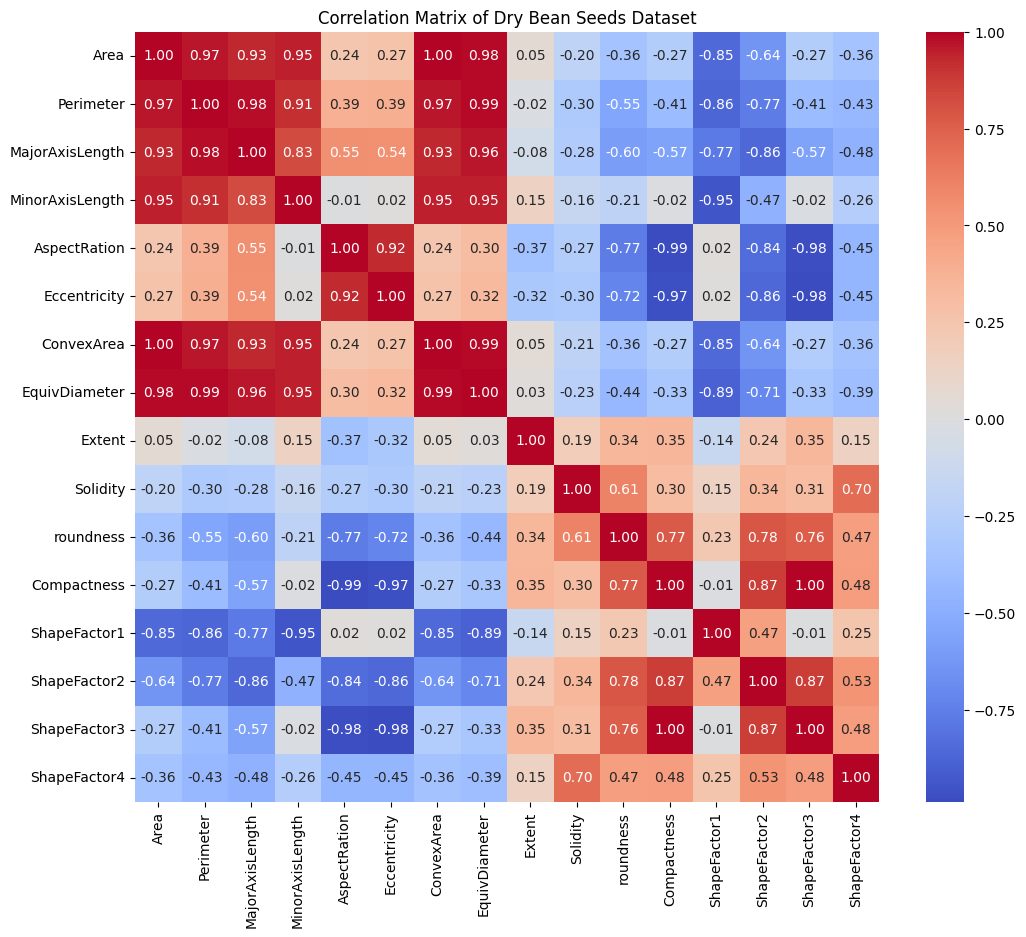

In [8]:
# Generate correlation matrix without Class
corr_matrix = df.drop('Class', axis=1).corr()

# Plotting seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dry Bean Seeds Dataset')
plt.show()

In [9]:
# Drop some features that are not useful, note althought some
X = df.drop(['Class', 'Compactness', 'EquivDiameter', 'Perimeter'], axis=1)
# One hot encode the y
y = pd.get_dummies(df['Class'])

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# scale the data between 0 and 1
transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

# Part 1 my neural network

In [14]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        # Initialize weights with bias: shapes (hidden_size, input_size+1) and (output_size, hidden_size+1)
        self.W1 = np.random.randn(hidden_size, input_size + 1)
        self.W2 = np.random.randn(output_size, hidden_size + 1)
        self.lr = lr

    def activation(self, Z):
        return np.tanh(Z)

    def activation_deriv(self, Z):
        return 1 - np.tanh(Z) ** 2

    # https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python
    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def forward(self, X):
        m = X.shape[0]
        # Add bias
        self.X_bias = np.hstack((np.ones((m, 1)), X))
        # Hidden layer
        self.Z1 = self.X_bias @ self.W1.T
        self.A1 = self.activation(self.Z1)
        self.A1_bias = np.hstack((np.ones((m, 1)), self.A1))
        # Output layer
        self.Z2 = self.A1_bias @ self.W2.T
        # Use softmax activation to obtain class probabilities
        self.A2 = self.softmax(self.Z2)
        return self.A2

    # Compute the loss
    def compute_loss(self, Y_true, Y_pred):
        eps = 1e-15
        loss = -np.mean(np.sum(Y_true * np.log(Y_pred + eps), axis=1))
        return loss

    def backward(self, X, Y_true):
        m = X.shape[0]

        # Update output layer
        delta2 = Y_true - self.A2
        dW2 = delta2.T @ self.A1_bias / m

        # Update hidden layer
        delta1 = (delta2 @ self.W2[:, 1:]) * self.activation_deriv(self.Z1)
        dW1 = delta1.T @ self.X_bias / m

        # Standard gradient descent
        self.W2 += self.lr * dW2
        self.W1 += self.lr * dW1

    def train(self, X, Y, epochs=1000, batch_size=32):
        m = X.shape[0]
        for epoch in range(epochs):
            perm = np.random.permutation(m)
            X_shuffled, Y_shuffled = X[perm], Y[perm]

            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i : i + batch_size]
                Y_batch = Y_shuffled[i : i + batch_size]
                self.forward(X_batch)
                self.backward(X_batch, Y_batch)

            if (epoch + 1) % 5 == 0 or epoch == 0:
                Y_pred_full = self.forward(X)
                loss_val = self.compute_loss(Y, Y_pred_full)
                print(f"Epoch {(epoch+1):4d}/{epochs}: Loss = {loss_val:.5f}")

    def predict(self, X):
        A = self.forward(X)
        return np.argmax(A, axis=1)


In [23]:
# Intiliaze parameters
input_size = X_train.shape[1]
hidden_size = 14
output_size = y_train.shape[1]
learning_rate = 0.01

# Create model
my_nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

# Train the model
my_nn.train(X_train, y_train.values, epochs=100, batch_size=128)
# compare accuracies of prediction with true
y_pred = my_nn.predict(X_test)
accuracy = np.mean(y_pred == np.argmax(y_test.values, axis=1))
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch    1/100: Loss = 3.66499
Epoch    5/100: Loss = 3.03141
Epoch   10/100: Loss = 2.56173
Epoch   15/100: Loss = 2.21103
Epoch   20/100: Loss = 1.98467
Epoch   25/100: Loss = 1.87872
Epoch   30/100: Loss = 1.84772
Epoch   35/100: Loss = 1.84038
Epoch   40/100: Loss = 1.83821
Epoch   45/100: Loss = 1.83729
Epoch   50/100: Loss = 1.83684
Epoch   55/100: Loss = 1.83661
Epoch   60/100: Loss = 1.83650
Epoch   65/100: Loss = 1.83643
Epoch   70/100: Loss = 1.83638
Epoch   75/100: Loss = 1.83634
Epoch   80/100: Loss = 1.83632
Epoch   85/100: Loss = 1.83632
Epoch   90/100: Loss = 1.83632
Epoch   95/100: Loss = 1.83630
Epoch  100/100: Loss = 1.83630
Accuracy: 25.74%


I spent way too long trying to fix issues with loss and not "converging" until I finally realized my implementation is too simple for this problem. I likely need more layers or a better update function to get better loss updates. I tested this by created a similar MLP in SKlearn with same activation functions and updates and that also didn't converge any better. In the future it would be better to make my implementation more robust. This accuracy is criminally bad for how long I spent. I do not think I implemented anything horribly wrong but maybe I did.. feel free to LMK. I used minibatch gradient descent and got the best results with it.

# Part 2
I decided to use pytorch since I was already familar with it.
Here are some relevant links that I used:
- https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
- https://pytorch.org/docs/stable/autograd.html
- https://pytorch.org/docs/stable/nn.html#loss-functions
- https://pytorch.org/docs/stable/optim.html

Autograd helps with computing gradients on the fly. For loss-functions I used BCEWithLogitsLoss and the docs helped inform me on this. For optimization I used RMSprop.

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

class TorchNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(TorchNN, self).__init__()
        # Using the Linear module from torch since it creates a very
        # easy linear layer we can activate on
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, num_classes)
        # Define activation function
        self.tanh = nn.Tanh()

    # Forward pass is very simple here
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        return out

In [40]:
# Convert to tensors for efficient pytorch computations
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

input_dim = X_train_tensor.shape[1]
hidden_dim = 64
output_dim = y_train_tensor.shape[1]
lr = 0.01

model = TorchNN(input_dim, hidden_dim, output_dim)

# Create loss function and optimizer
crit = nn.BCEWithLogitsLoss()
opt = optim.RMSprop(model.parameters(), lr=lr)

num_epochs = 100
batch_size = 128

# Training loop
model.train()
for epoch in range(num_epochs):
    # Shuffle data for batches
    permutation = torch.randperm(X_train_tensor.size(0))

    epoch_loss = 0.0
    num_batches = 0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x = X_train_tensor[indices]
        batch_y = y_train_tensor[indices]

        # Forward pass
        outputs = model(batch_x)
        loss = crit(outputs, batch_y)

        # Backward pass and optimize
        opt.zero_grad()
        loss.backward()
        opt.step()

        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    if epoch % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    probs = torch.sigmoid(test_outputs)
    predicted_labels = torch.argmax(probs, dim=1)

    # True labels: we also do argmax across each row of y_test_tensor
    true_labels = torch.argmax(y_test_tensor, dim=1)

    # Compute accuracy
    correct = (predicted_labels == true_labels).sum().item()
    accuracy = correct / y_test_tensor.size(0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch [1/100], Loss: 0.4260
Epoch [6/100], Loss: 0.3929
Epoch [11/100], Loss: 0.3913
Epoch [16/100], Loss: 0.3764
Epoch [21/100], Loss: 0.3678
Epoch [26/100], Loss: 0.3572
Epoch [31/100], Loss: 0.3462
Epoch [36/100], Loss: 0.3486
Epoch [41/100], Loss: 0.3338
Epoch [46/100], Loss: 0.3335
Epoch [51/100], Loss: 0.3258
Epoch [56/100], Loss: 0.3159
Epoch [61/100], Loss: 0.3073
Epoch [66/100], Loss: 0.3106
Epoch [71/100], Loss: 0.2969
Epoch [76/100], Loss: 0.2906
Epoch [81/100], Loss: 0.2920
Epoch [86/100], Loss: 0.2895
Epoch [91/100], Loss: 0.2847
Epoch [96/100], Loss: 0.2822
Test Accuracy: 53.36%


We got much better accuracy on this very hard dataset. Note that since it has 7 classes having 53.36% accuracy is very good with these limited features. Now for Task 3 I experimented several times with different hyperparameters, loss functions, and optimizations techniques. This seemed to get me the best results. I think RMSProp is a great optimization tool and very consistently good across problems. I also stuck with minibatch gradient descent since it weighs the positives of both stochastic and standard. I didn't bother with regularization since the loss seems to be consistently decreasing as shown by the output so we never got too off track.
## Task 4:

In [55]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

# try logistic regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, np.argmax(y_train.values, axis=1))
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(np.argmax(y_test.values, axis=1), y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

XGBoost Accuracy: 0.8920308483290489
Logistic Regression Accuracy: 0.2574366507528461


For fun I tried both XGboost and logistic regression. The results make sense. The simplest model is logistic regression so it performs the worst. The next most complex model is my neural network thus coming in second. The most complex model is XGBoost leading the charge in first. Although typically XGBoost is seen as a more simple model and more explainable since my neural network was a very simple architecture and not deep it was unable to fit the more complex patterns.